# Multi-Armed Bandit (MAB) algorithms

##### Author : ELMOUSLIH Salah-Eddine

SMPyBandits is a package for Single and Multi Players multi-armed Bandits algorithms that will help us work around the problem. 
Documentation at : https://smpybandits.github.io/

First begin by downloading the library 

In [13]:
!pip install git+https://github.com/SMPyBandits/SMPyBandits.git#egg=SMPyBandits[full]

In [373]:
#importing useful libraries
from SMPyBandits.Environment import MAB
from SMPyBandits.Arms import Bernoulli
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Environment initialization

A MAB environment consists of k arms from which an agent can obtain samples. 

the  `gen_arm()` function takes **k**, the number of Bernoulli arms to generate, and **p**, the list of respective parameters.

Note that the length of the list should match the number of arms that you want to generate.

In [165]:
#generating arms
def gen_arm(k , p:list):
    arms = []
    if len(p) == k:
        for i in range (k):
            arms.append(Bernoulli(p[i]))
        return arms
    else : raise ValueError('length of list must match provided number', k, p) 

Now we will create 3 arms with parameters 0.5, 0.45 and 0.1 respectively in order to create a MAB environement

In [50]:
#defining the parameters range
p = [0.5,0.45,0.1]

In [ ]:
#creating the arms
arms = gen_arm(3,p)

The second step is to use the defined MAB function for the **SMPyBandits** package to create an MAB environement with our configuration 

In [168]:
#environnement creation
def create_MAB_env(configuration):
    return MAB(configuration)

In [169]:
env = create_MAB_env(arms)



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.5), B(0.45), B(0.1)] ...
 - with 'arms' = [B(0.5), B(0.45), B(0.1)]
 - with 'means' = [0.5  0.45 0.1 ]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.5
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 11.1 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 51.67% ...
 - with 'arms' represented as: $[B(0.5)^*, B(0.45), B(0.1)]$


We can see now that our environement has been initialized with the arms we created earlier. 
We get some additional informations thanks to the **SMPyBandits** library.

### Simulation
Now that our environement is initialized, we will draw 10 samples 50 times to calculate the sample means.
We first define two functions;

- `draw_samples(ndraws, env)` that takes as arguments the number of draws **ndraws** and the MAB environement to work with **env** , and uses the **draw_nparray** function provided by the library to draw samples from each arm.

- `draw(i,p)` simply draw a single sample from the i-th arm 

In [170]:
def draw_samples(ndraws, env):
    means = []
    draws = np.ones((len(env.arms),ndraws))
    for i, arm in enumerate(env.arms):
        draws[i] = arm.draw_nparray(ndraws)
        means.append(draws[i].mean())
        
    return draws, means

In [171]:
def draw(i, p):
    return np.random.binomial(1, p[i])

Now, we can test both functions to draw 10 samples from each arm:

###### - Using the first function:

In [175]:
# Draw n = 10 samples from each arm
n = 10
samples, means = draw_samples(n,env)

print(samples)
means 

[[1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[0.6, 0.7, 0.0]

###### - Using the second function:

In [177]:
# Draw n = 10 samples from each arm
n = 10

samples = []
for i in range(len(env.arms)):
    samples.append([draw(i,p) for _ in range(n)])

# Calculate an empirical estimate of the sample means
empirical_means = [np.mean(arm) for arm in samples]
print(samples)
print(empirical_means)

[[1, 0, 0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]
[0.4, 0.4, 0.1]


We will now repeat the expirement 50 times to obtain m sample-means for each arm, and provide a boxplot visualization of the
empirical means obtained

In [386]:
# Repeating m = 50 times to obtain m sample-means for each arm
def sim(envi, n, m=50):
    empirical_means = []
    empirical_means_all = []

    for _ in range(m):
        samples = []
        for i in range(len(envi.arms)):
            samples.append([draw(i,p) for _ in range(n)])

        #Calculating an empirical estimate of the sample means
        empirical_means = [np.mean(arm) for arm in samples]
        empirical_means_all.append(empirical_means)
    
    #Creating a dataframe to store the m-sample means for each arm
    df = pd.DataFrame(empirical_means_all, columns = ['Arm_1', 'Arm_2', 'Arm_3'])
    
    #Providing a boxplot visualization of the empirical means obtained
    for column in df:
        sns.boxplot(data=df, orient='v', width=0.3, linewidth= 3)
        plt.title('50 sample means of X with %d rounds' %n)
        plt.xlabel('arms')
        plt.ylabel('means')

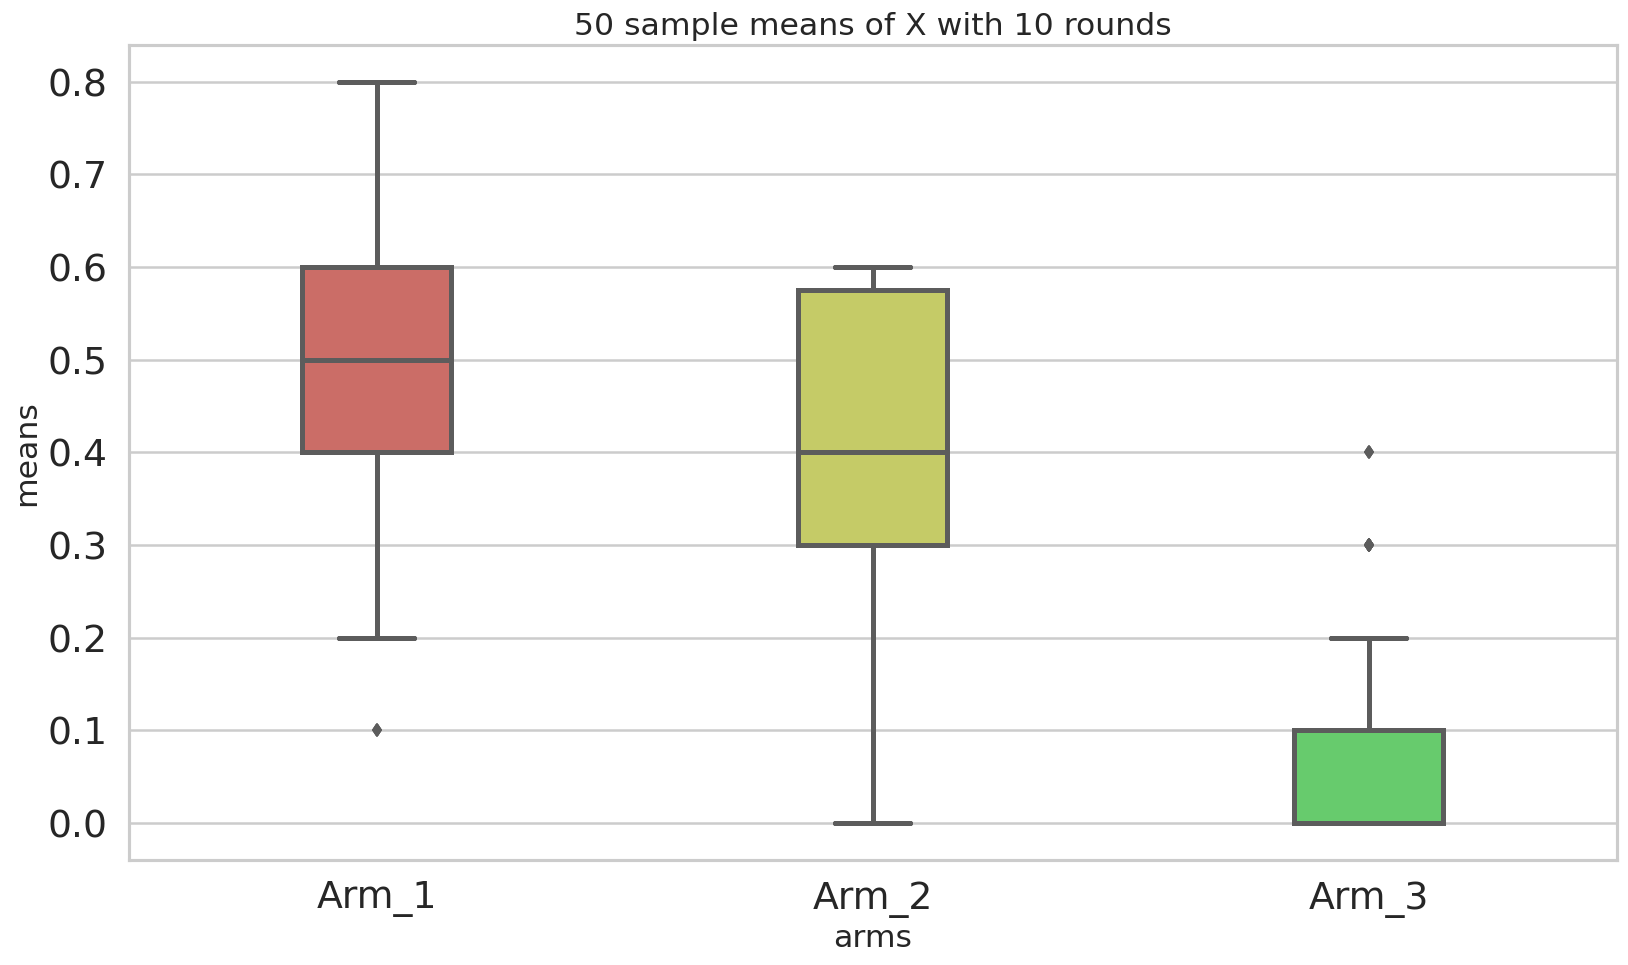

In [387]:
sim(env,10)

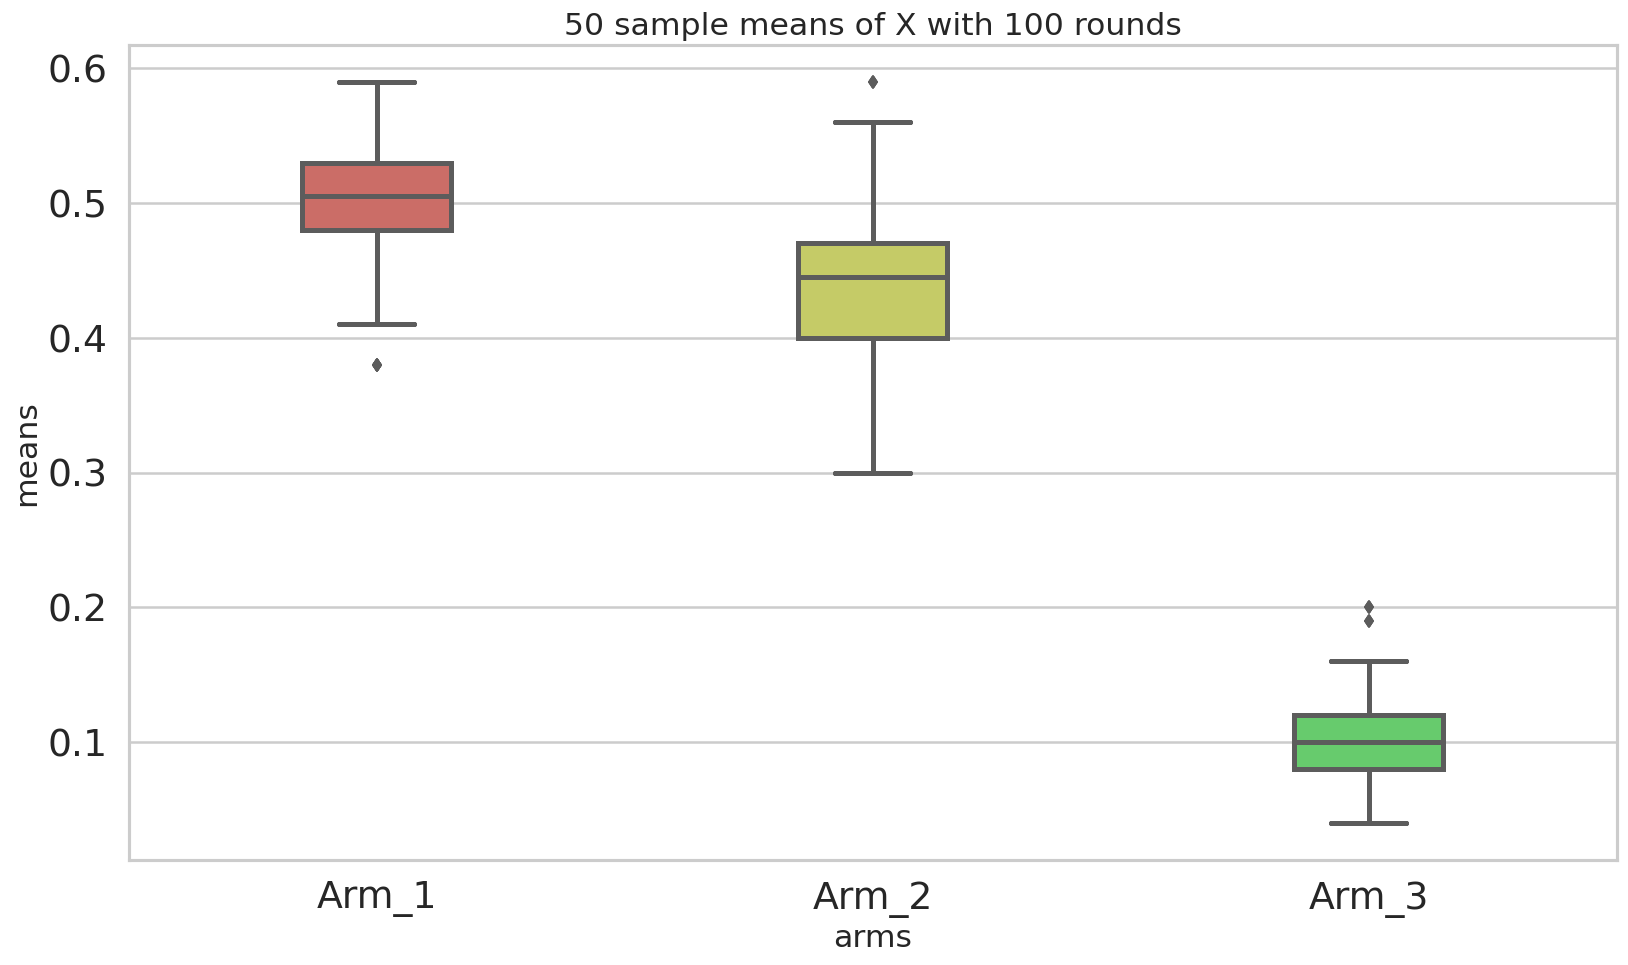

In [388]:
sim(env, 100)

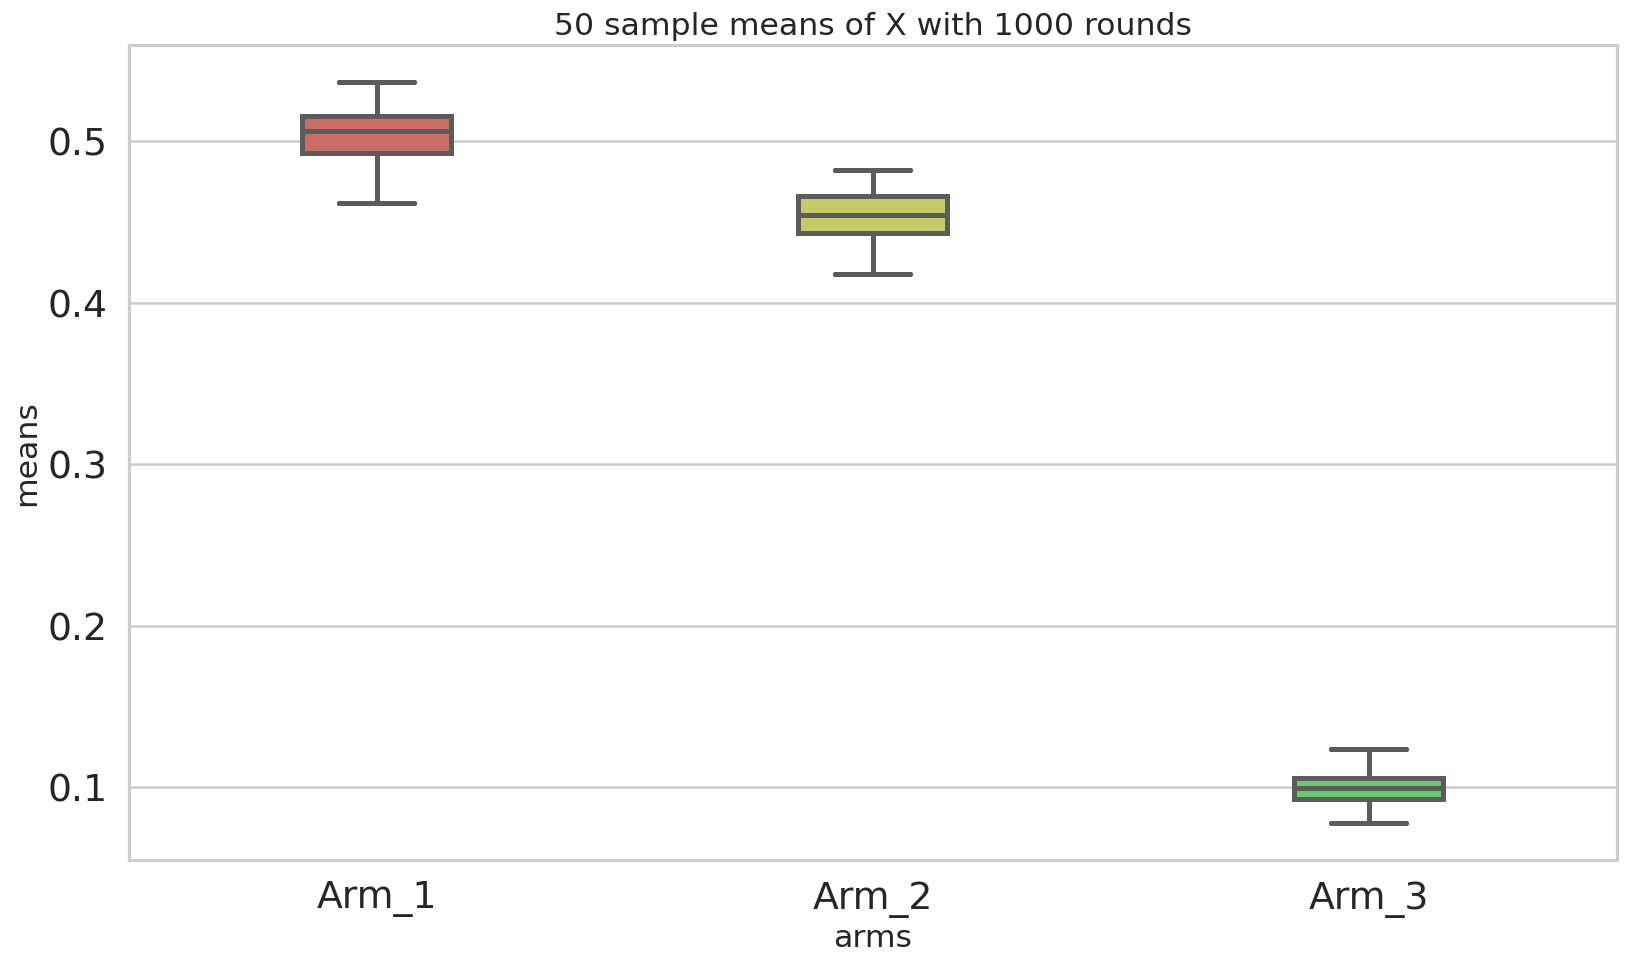

In [389]:
sim(env,1000)

We will now try a diffrent configuration:

In [390]:
arms_2 = gen_arm(3,[0.1,0.7,0.6])
env_2 = create_MAB_env(arms_2)



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.1), B(0.7), B(0.6)] ...
 - with 'arms' = [B(0.1), B(0.7), B(0.6)]
 - with 'means' = [0.1 0.7 0.6]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.7
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 5.18 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 43.33% ...
 - with 'arms' represented as: $[B(0.1), B(0.7)^*, B(0.6)]$


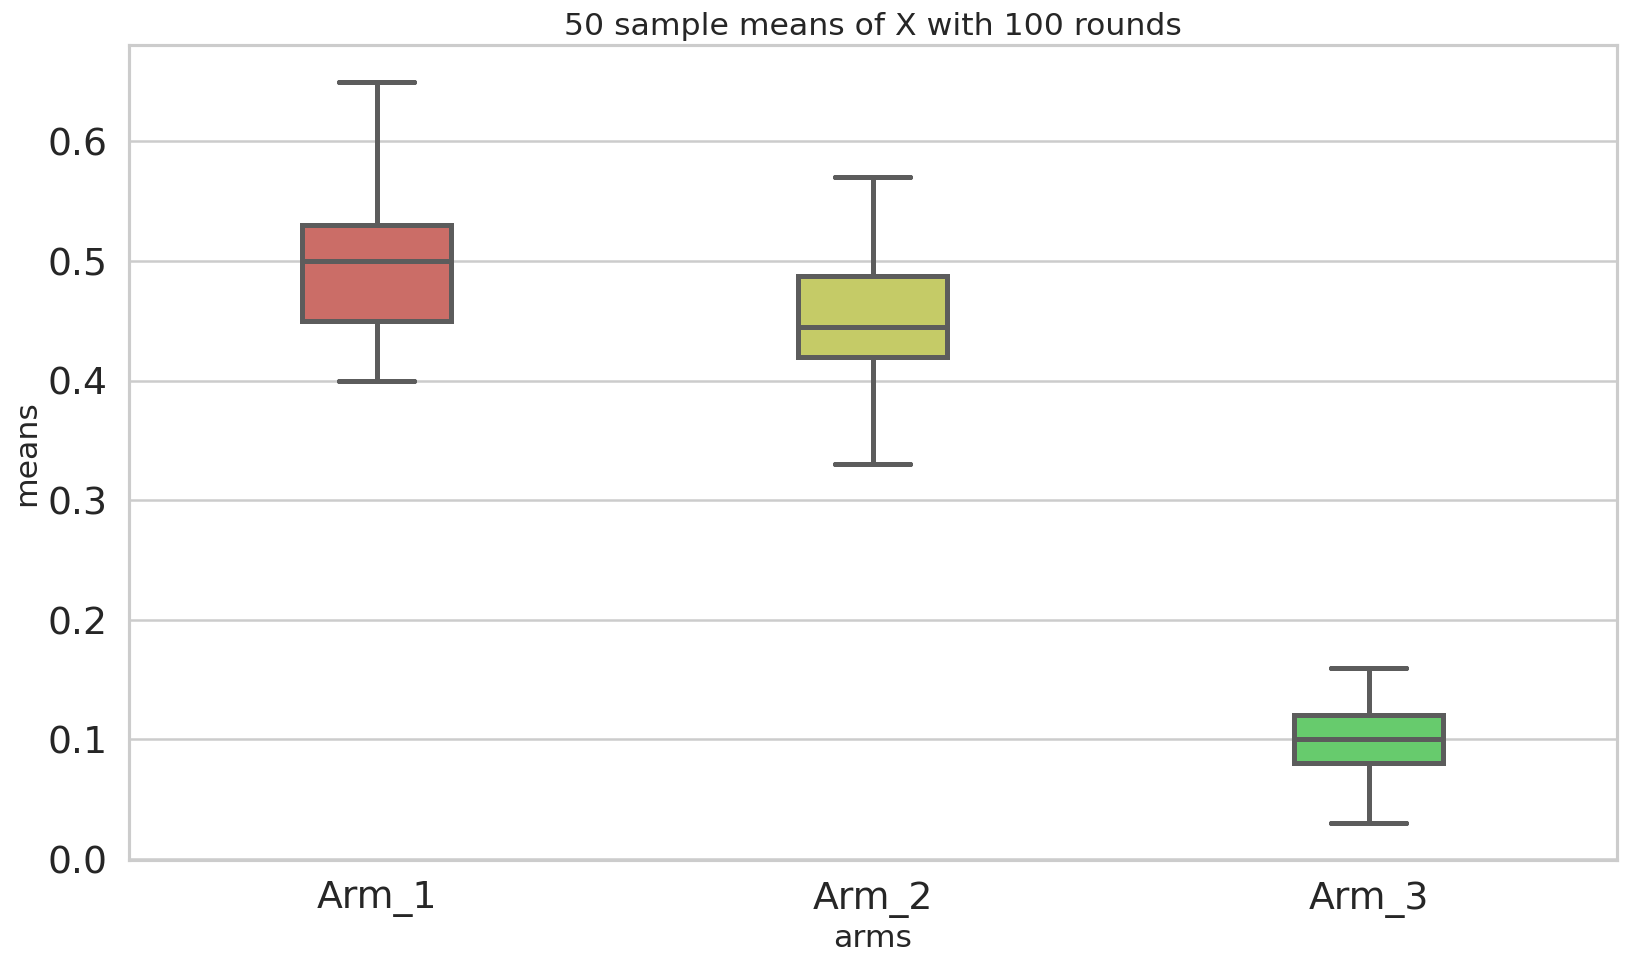

In [393]:
sim(env_2,100)

We can see that varying Bernoulli parameters gives us different means each time and that makes sense whereas increasing the number of rounds reduces variance

## 2. About the Leader algorithm

We will first create a function to set the number of times each arm has been played to 1 

In [201]:
def initiate_draw(env):
    T = np.zeros(3)
    for i in range(len(env.arms)):
        T[i] += 1 
    return T

In [154]:
#Setting some constants
num_rounds = 100

Now we will define the leader algorithm

In [400]:
def Leader (env, num_rounds):
     
    #drawing a single sample and calculating the mean
    draw_1, mean = draw_samples(1,env)  
    #set the number of times each arm has been played to 1
    T = initiate_draw(env)
    
    #looping over the num_rounds
    for t in range(num_rounds):
        #selecting the policy which is the index of the arm with the greatest mean
        pi_t = np.argmax(mean) 
        print('round',t+1, ', chosen lever: ', pi_t+1)
        #drawing a single sample from the selected arm and calculating the mean
        mean[pi_t] = ((mean[pi_t]*T[pi_t])
                      +(env.arms[pi_t].draw(1)))/(T[pi_t]+1)
        print('mean of chosen lever', mean[pi_t].round(2))
        #incrementing the number the selected arm is chosen
        T[pi_t] += 1
        print('='.center(28,'='))
    print('mean of each arm is ', mean )
    #print('number of draws is ', T )

    return mean, T


we will play the strategy for 100 rounds calculating the empirical mean of each arm and exposing the chosen lever with its mean at each round:

In [401]:
mu_, T_ =  Leader(env,100)

round 1 , chosen lever:  1
mean of chosen lever 0.5
round 2 , chosen lever:  1
mean of chosen lever 0.67
round 3 , chosen lever:  1
mean of chosen lever 0.5
round 4 , chosen lever:  1
mean of chosen lever 0.4
round 5 , chosen lever:  1
mean of chosen lever 0.5
round 6 , chosen lever:  1
mean of chosen lever 0.57
round 7 , chosen lever:  1
mean of chosen lever 0.62
round 8 , chosen lever:  1
mean of chosen lever 0.56
round 9 , chosen lever:  1
mean of chosen lever 0.5
round 10 , chosen lever:  1
mean of chosen lever 0.45
round 11 , chosen lever:  1
mean of chosen lever 0.5
round 12 , chosen lever:  1
mean of chosen lever 0.54
round 13 , chosen lever:  1
mean of chosen lever 0.5
round 14 , chosen lever:  1
mean of chosen lever 0.53
round 15 , chosen lever:  1
mean of chosen lever 0.5
round 16 , chosen lever:  1
mean of chosen lever 0.53
round 17 , chosen lever:  1
mean of chosen lever 0.5
round 18 , chosen lever:  1
mean of chosen lever 0.53
round 19 , chosen lever:  1
mean of chosen lev

Now, we will define the same algorithm but with no printing statement

In [214]:
def Leader_2(env, num_rounds):
    
    draw_1, mean = draw_samples(1,env)  
    T = initiate_draw(env)
    
    for t in range(num_rounds):
        pi_t = np.argmax(mean) 
        mean[pi_t] = ((mean[pi_t]*T[pi_t])
                      +(env.arms[pi_t].draw(1)))/(T[pi_t]+1)
        T[pi_t] += 1

    return mean, T

### Simulation

Next, we will define a `sim_leader` function to simulate the above algorithm 50 times.

In [414]:
def sim_leader(n_rounds, m=50):
    means = []
    #repeating the process m=50 times
    for _ in range (m):
        means.append(Leader_2(env,n_rounds)[0])

    #Creating a dataframe to store the m-sample means for each arm
    df = pd.DataFrame(means, columns = ['Arm_1', 'Arm_2', 'Arm_3'])

    #Providing a boxplot visualization of the empirical means obtained
    for column in df:
        sns.boxplot(data=df, orient='v', width=0.3, linewidth= 3)
        plt.title('50 sample means of X with %d rounds' %n_rounds)
        plt.xlabel('arms')
        plt.ylabel('means')

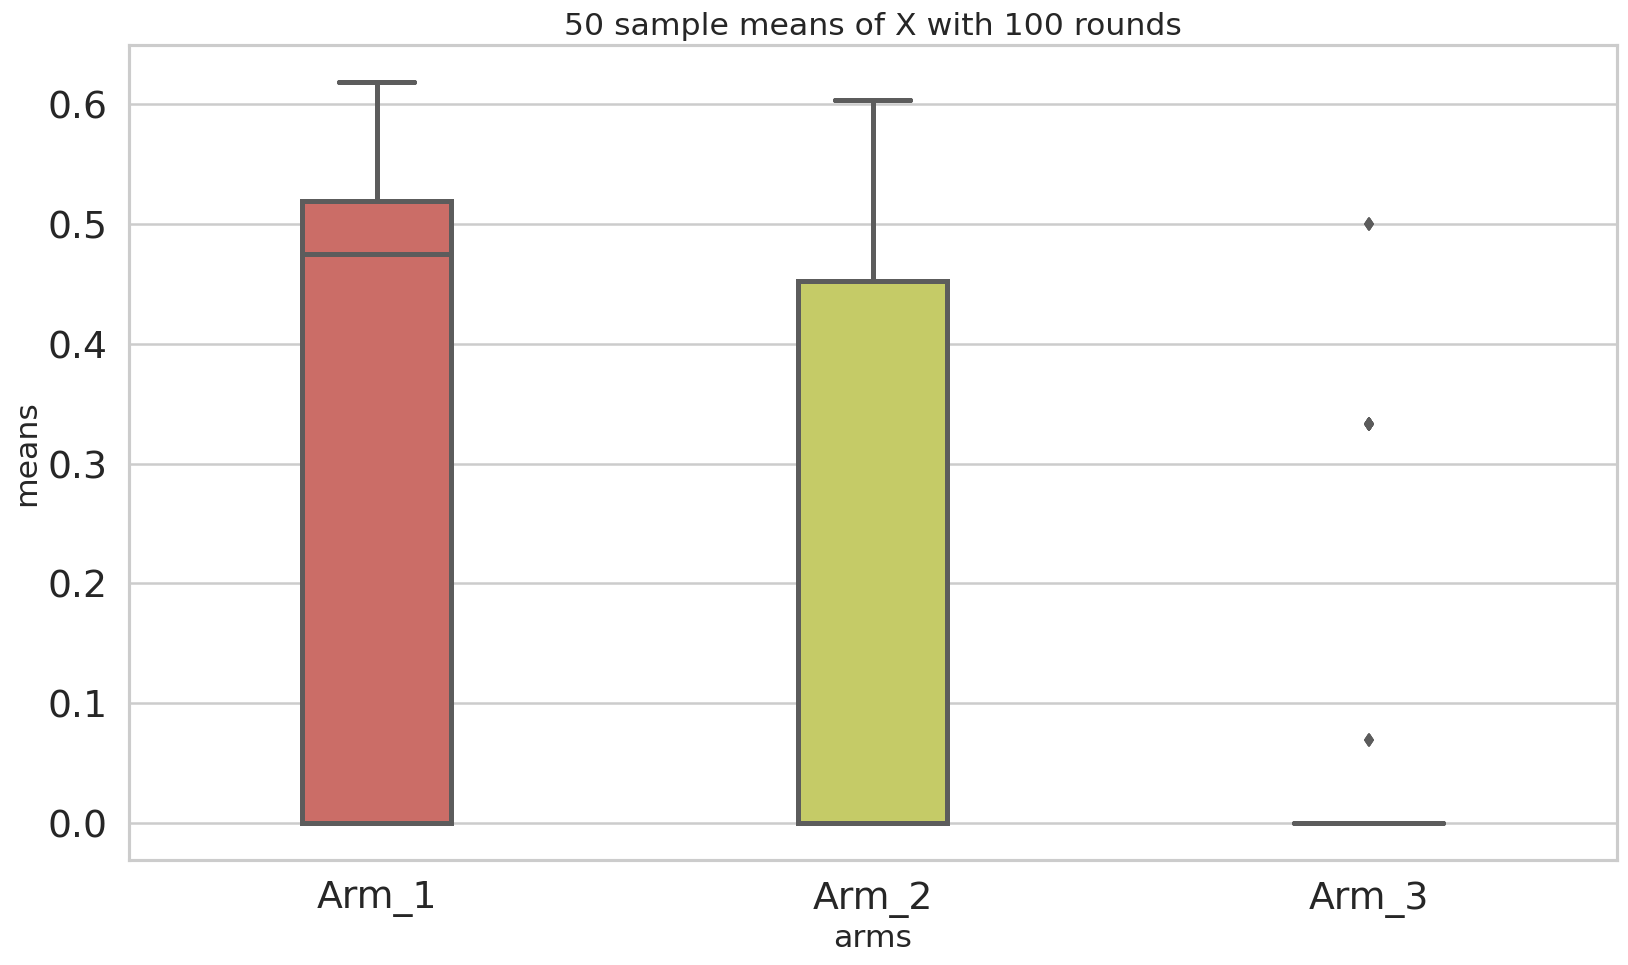

In [415]:
sim_leader(100)

We can say that the difference between the above boxplot the boxplot provided in the first part is the fact that the third arm was almost never chosen which means that this algorithm is efficient at chosen the arms with the bigger rewards but not the best rewards.

### Defining the reward

Now that our simulation has taken place, we will define a reward function `leader_reward` that substracts the rewrad obtained from the arm selected by the algorithm at round t and the reward produced by the best arm at the same round for **n=1000** rounds

In [416]:
def leader_reward(env, num_rounds=1000):
    mu_p = 0
    
    draw_1, mean = draw_samples(1,env)  
    T = initiate_draw(env)
    sigma = []
    
    for t in range(num_rounds):
        pi_t = np.argmax(mean) 
        X_pi_t = env.arms[pi_t].draw(1)
        mean[pi_t] = mean[pi_t]*T[pi_t]+X_pi_t/(T[pi_t]+1)
        T[pi_t] += 1
        
        #computing the differene of rewards for each round
        sigma.append(env.arms[0].draw(1) - X_pi_t)
    #count occurences
    print(Counter(sigma))
    #plotting the sequence of sigmas
    plt.plot(sigma, 'o')
    plt.xlabel('Rounds')
    plt.ylabel('Difference of rewards')
    plt.title('Rewards of the Leader Algorithm')

Counter({0: 506, 1: 257, -1: 237})


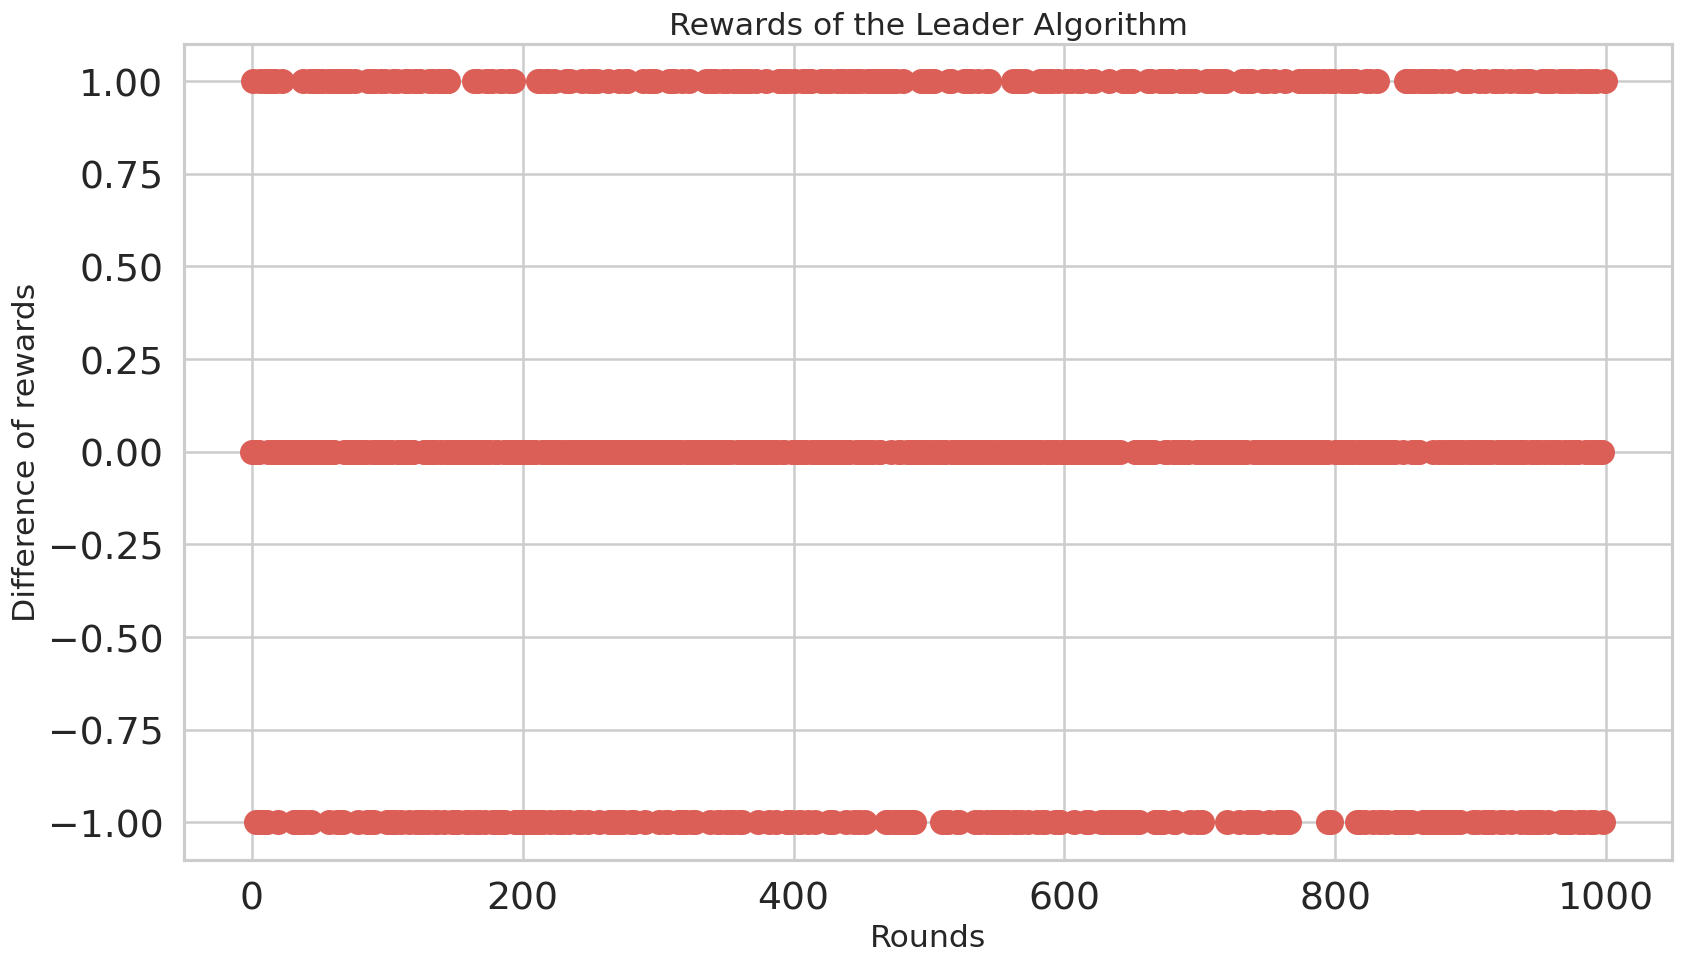

In [417]:
leader_reward(env)

We can see that most of around 50% of the time, the difference of the rewards is 0 which might be explained by the fact that the algorithm choses the best arm half of the time

## 3. About the UCB Algorithm

In [405]:
def UCB1(env, num_rounds):
    
    #drawing a single sample and calculating the mean
    draw_1, mean = draw_samples(1,env)  
    #set the number of times each arm has been played to 1
    T = initiate_draw(env)
    
    for t in range(num_rounds):
        
        pi_t_0 = np.argmax(mean) 
        
        #the log penalization
        beta = np.sqrt(2*np.log(t)/T[pi_t_0])
        
        pi_t = np.argmax(mean+beta) 
        print('round',t+1, ', chosen lever: ', pi_t+1)
        mean[pi_t] = ((mean[pi_t]*T[pi_t])+(env.arms[pi_t].draw(1)))/(T[pi_t]+1)
        print('mean of chosen lever',mean[pi_t].round(2))
        T[pi_t] += 1
        print('='.center(25,'='))
        
    print('mean of each arm is ', mean )
    print('number of draws is ', T )

    return mean, T

In [406]:
_,_ = UCB1(env,100)

round 1 , chosen lever:  1
mean of chosen lever 1.0
round 2 , chosen lever:  1
mean of chosen lever 0.67
round 3 , chosen lever:  1
mean of chosen lever 0.75
round 4 , chosen lever:  1
mean of chosen lever 0.6
round 5 , chosen lever:  1
mean of chosen lever 0.5
round 6 , chosen lever:  1
mean of chosen lever 0.43
round 7 , chosen lever:  1
mean of chosen lever 0.5
round 8 , chosen lever:  1
mean of chosen lever 0.44
round 9 , chosen lever:  1
mean of chosen lever 0.5
round 10 , chosen lever:  1
mean of chosen lever 0.55
round 11 , chosen lever:  1
mean of chosen lever 0.5
round 12 , chosen lever:  1
mean of chosen lever 0.54
round 13 , chosen lever:  1
mean of chosen lever 0.57
round 14 , chosen lever:  1
mean of chosen lever 0.6
round 15 , chosen lever:  1
mean of chosen lever 0.56
round 16 , chosen lever:  1
mean of chosen lever 0.53
round 17 , chosen lever:  1
mean of chosen lever 0.56
round 18 , chosen lever:  1
mean of chosen lever 0.58
round 19 , chosen lever:  1
mean of chosen l

In [407]:
def UCB1_2(env, num_rounds):
    mu_p = 0
    
    #
    draw_1, mean = draw_samples(1,env)  
    T = initiate_draw(env)
    
    #
    for t in range(num_rounds):
        
        pi_t_0 = np.argmax(mean) 
        beta = np.sqrt(2*np.log(t)/T[pi_t_0])
        
        pi_t = np.argmax(mean+beta) 
        mean[pi_t] = ((mean[pi_t]*T[pi_t])+(env.arms[pi_t].draw(1)))/(T[pi_t]+1)
        T[pi_t] += 1

    return mean, T

In [408]:
def sim_ucb(n_rounds, m=50):
    means = []
    for _ in range (m):
        means.append(UCB1_2(env,n_rounds)[0])

    df = pd.DataFrame(means, columns = ['Arm_1', 'Arm_2', 'Arm_3'])

    for column in df:
        sns.boxplot(data=df, orient='v', width=0.3, linewidth= 3)
        plt.title('50 sample means of X with %d rounds' %n_rounds)
        plt.xlabel('arms')
        plt.ylabel('means')

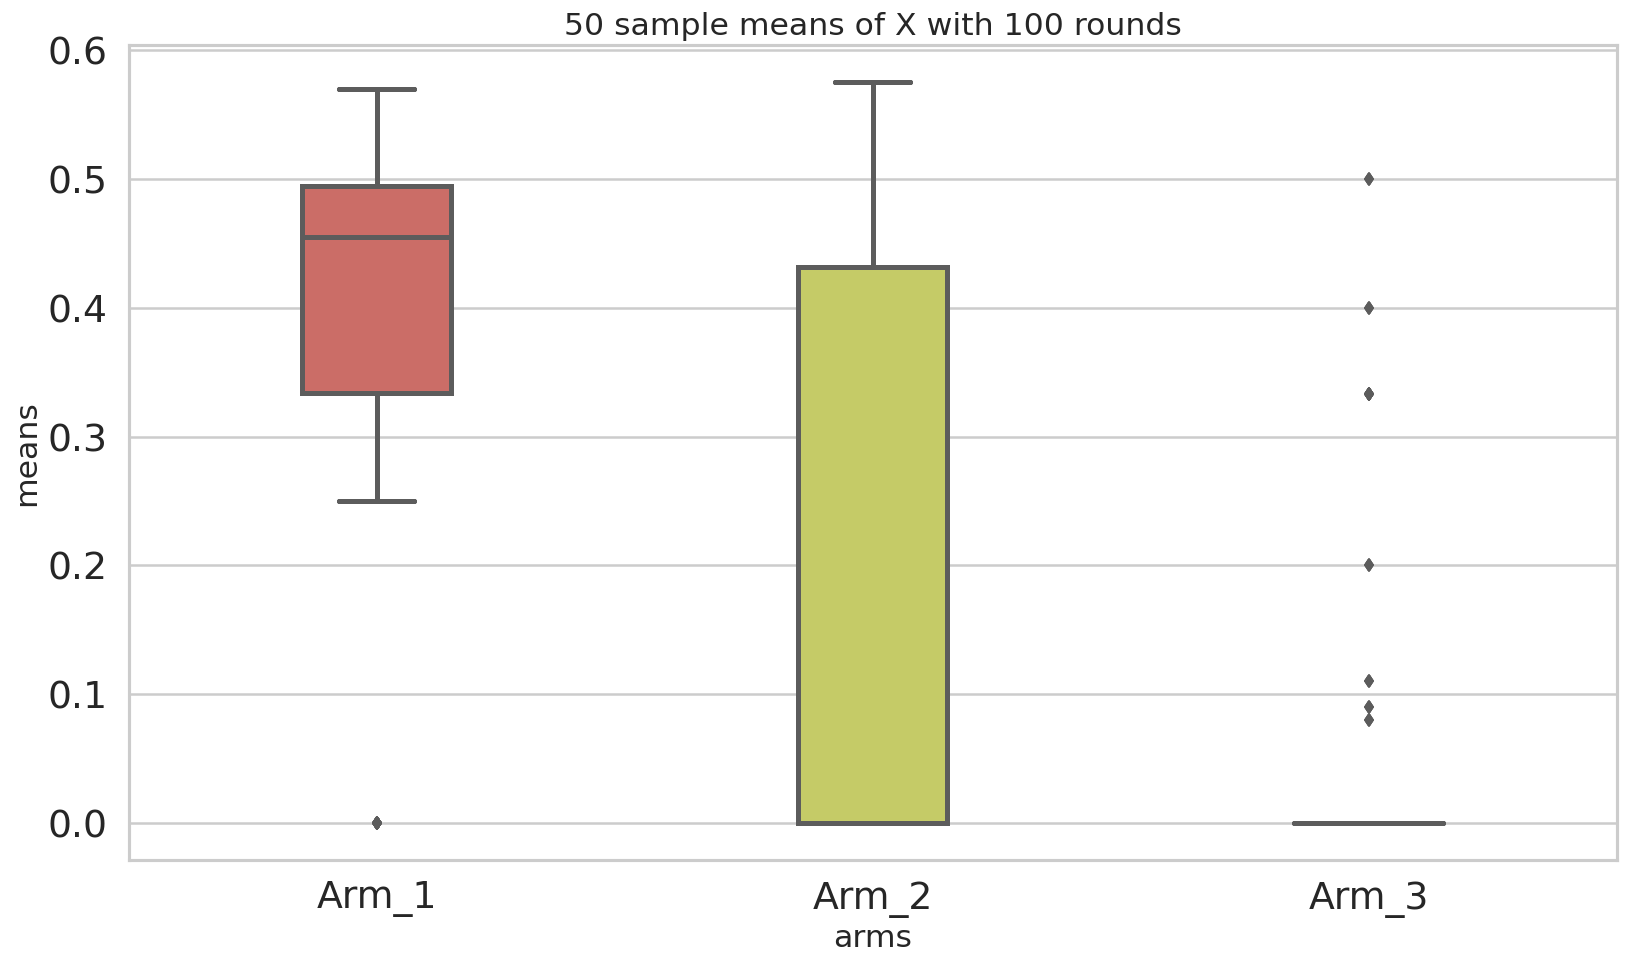

In [409]:
sim_ucb(100)

We can say that the difference between the above boxplot the boxplot provided in the first part is the fact that the third arm was slightly more chosen and that the second arm was chosen only sometimes which means that UCB algorithm is very efficient at chosing the arm with the maximum reward than the leader algorithm since it privileges exploration

### Defining the reward

In [410]:
def UCB1_reward(env, num_rounds=1000):
    mu_p = 0
    
    draw_1, mean = draw_samples(1,env)  
    T = initiate_draw(env)
    sigma = []
    for t in range(num_rounds):
        
        pi_t_0 = np.argmax(mean) 
        
        beta = np.sqrt(2*np.log(t)/T[pi_t_0])
        
        pi_t = np.argmax(mean+beta) 
        X_pi_t = env.arms[pi_t].draw(1)
        mean[pi_t] = ((mean[pi_t]*T[pi_t])+(X_pi_t))/(T[pi_t]+1)
        T[pi_t] += 1
        sigma.append(env.arms[0].draw(1)-X_pi_t)
    
    #count occurences
    print(Counter(sigma))
    
    plt.plot(sigma, 'o')
    plt.title('Rewards of the UCB Algorithm')
    plt.xlabel('Rounds')
    plt.ylabel('Difference of rewards')

Counter({0: 508, 1: 280, -1: 212})


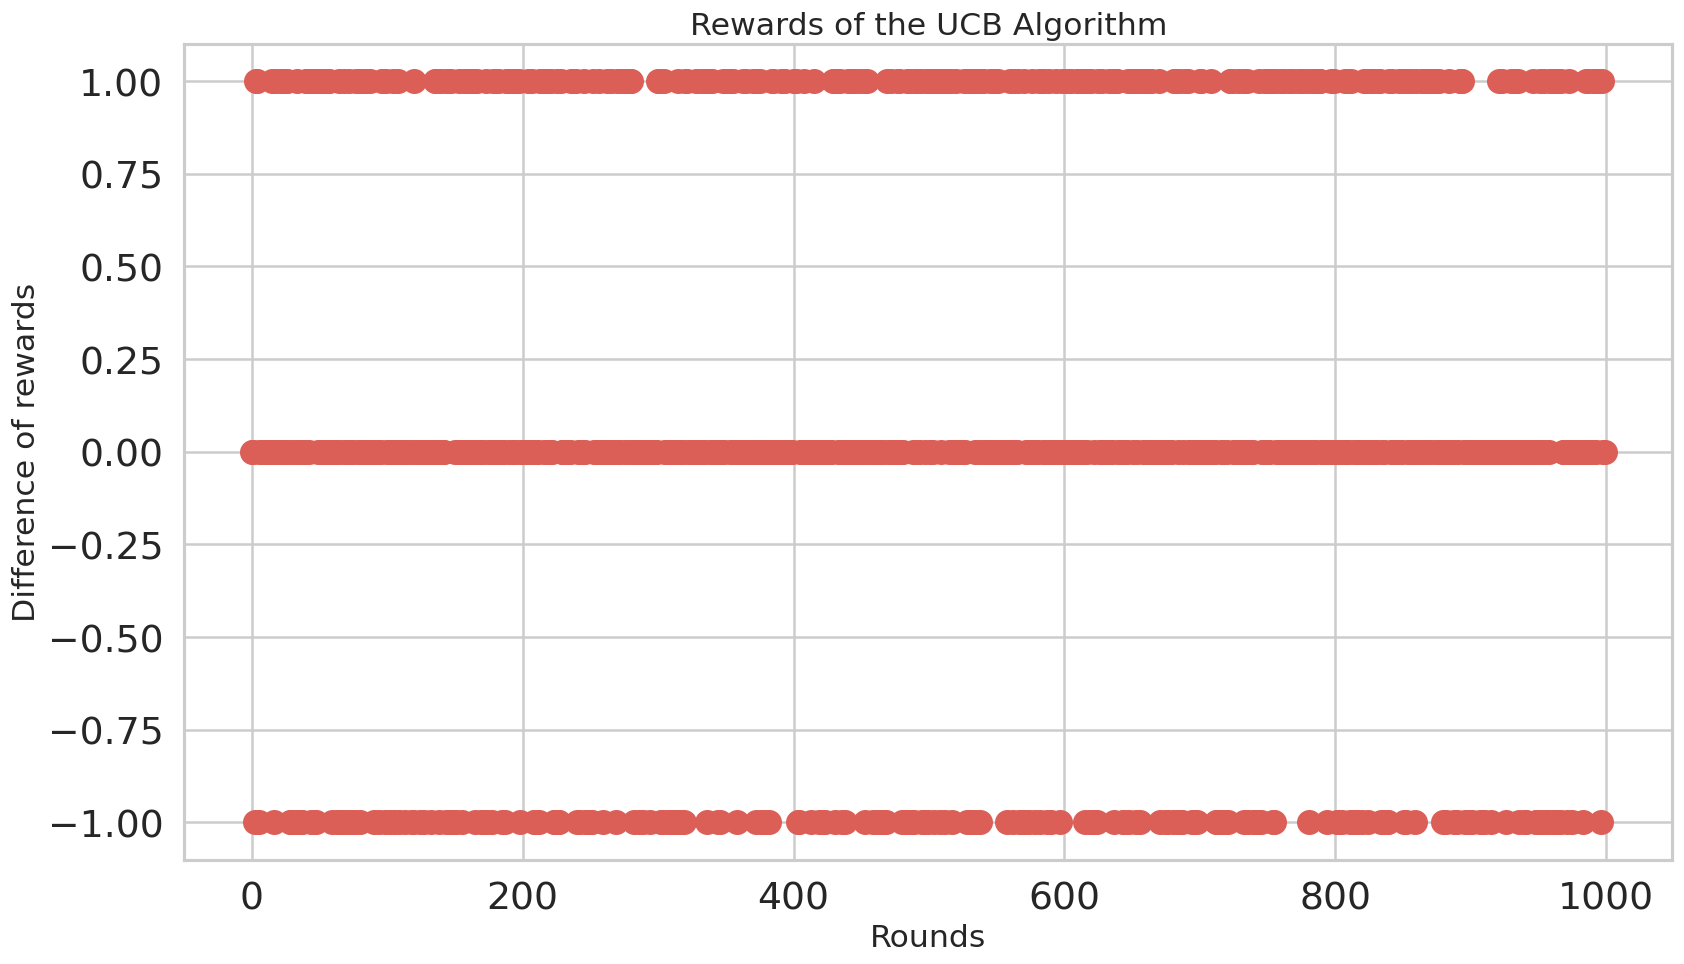

In [412]:
UCB1_reward(env)

We can also see here that most of around 50% of the time, the difference of the rewards is 0 which might be explained by the fact that the UCB algorithm choses also the best arm half of the time

We cannot pick for sure a better algorithm just by looking at these differences, Maybe we should check the regret. 

## END